### <center><font color ='green'>Data Pre-Processing</font></center>
### <center><font color='green'>of</font></center>
### <center><font color='green'>Google Play Dataset</font></center>

In [ ]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
# reading dataset
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

In [4]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
# lets check for null values
missing_data_percent = ((data.isna().sum())/10841)*100
missing_data_percent

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

##### Very less data is missing lets try to recover what we can

### <font color='#800000'>Rating</font>

In [6]:
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [7]:
# It is numerical attribute we can find the mean value and replace all misisng values with mean 
rating_mean = data['Rating'].mean().round()
data['Rating'] = data['Rating'].fillna(rating_mean)
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [8]:
# rating is from 1 to 5, 19.0 must have typed mistakenly, replacing with 1.9 which already exists in the data
data['Rating'] = data['Rating'].replace([19.], 1.9)
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

### <font color='#800000'>Type</font>

In [9]:
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

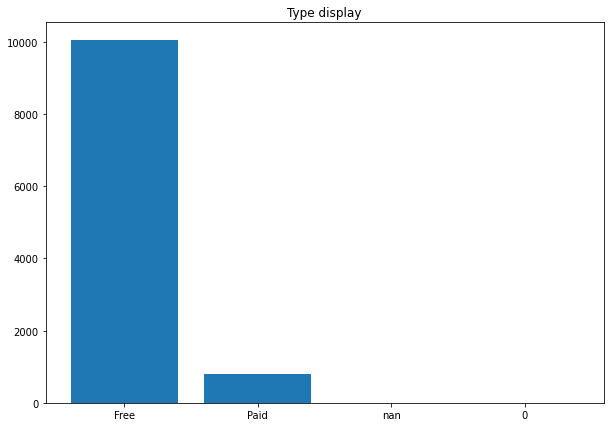

In [10]:
import matplotlib.pyplot as plt
import numpy as np
f_c = len(data[data['Type'] == 'Free'])
p_c = len(data[data['Type'] == 'Paid'])
n_c = len(data[data['Type'] == 'nan'])
a_c = len(data[data['Type'] == '0'])


catg = ['Free', 'Paid', 'nan', '0']
count = [f_c, p_c, n_c, a_c]

fig, ax = plt.subplots(figsize = (10,7))

ax.bar(catg, count)
ax.set_title('Type display')
plt.show()

##### From '0' we may mean all apps that cost zero mean that are free, as it is a categorical data we can find the mode of the data and fill all the nan values and '0' with the mode of the data

##### Checking 'Type' along with price to know if nan or 0 'Type' have been assigned any price

In [11]:
# Make new dataframe consisting of 'Type' & 'Price' so that we do not spoil main dataframe

frame1 = data[['Type', 'Price']]

# specifying conditions
filter1 = data["Type"]=="nan"
filter2 = data["Price"]!="0"

# applying conditions in new data frame
frame1.where(filter1 & filter2, inplace = True)       # sets rows values to nan if doesn't match criteria
frame1.count()     # counting values which are not nans

c:\users\ali naqvi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(


Type     0
Price    0
dtype: int64

##### We can say that there is not a single row which has type nan and its price is not zero, which means all nans have zero price which indicates that nans are free app, Its safe to put nans in free categories

In [12]:
# Similarly we can also check for 'Type = 0' & 'Price != 0'
# Make new dataframe consisting of 'Type' & 'Price' so that we do not spoil main dataframe

frame2 = data[['Type', 'Price']]

# specifying conditions
filter1 = data["Type"]=="0"
filter2 = data["Price"]!="0"

# applying conditions in new data frame
frame1.where(filter1 & filter2, inplace = True)      # sets rows values to nan if doesn't match criteria
frame1.count()     # counting values which are not nans

Type     0
Price    0
dtype: int64

##### We can say that there is not a single row which has type '0' and its price is not zero, which means all Type'0' have zero price which indicates that '0' are free app, In other words All those rows which have 'Type = 0' there 'Price' is also '0'. So we can also put them in free categories

In [13]:
# Now it safe to replace values in main dataframe
data['Type'] = data['Type'].replace(['nan', '0'], 'Free')
# As mostly apps are free so we can replace all nan with free
data['Type'] = data['Type'].fillna('Free')
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

### <font color='#800000'>Content Rating</font>

In [46]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

Adults only 18+ =  3
Unrated =  2


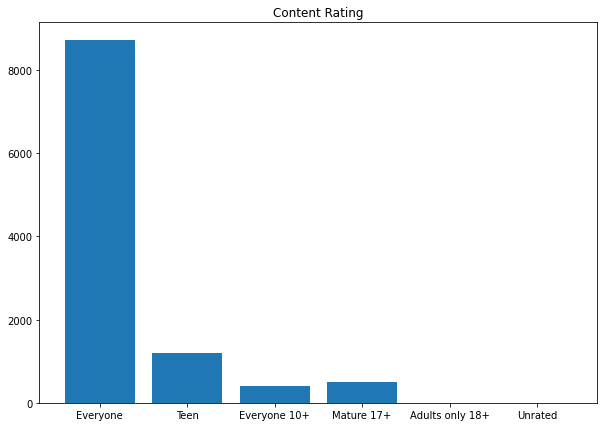

In [49]:
# Lets check how much data we have in each catgory of 'Content Rating'

import matplotlib.pyplot as plt
import numpy as np
e_c = len(data[data['Content Rating'] == 'Everyone'])
t_c = len(data[data['Content Rating'] == 'Teen'])
e10_c = len(data[data['Content Rating'] == 'Everyone 10+'])
m_c = len(data[data['Content Rating'] == 'Mature 17+'])
a_c = len(data[data['Content Rating'] == 'Adults only 18+'])
u_c = len(data[data['Content Rating'] == 'Unrated'])


catg = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+', 'Unrated']
count = [e_c, t_c, e10_c, m_c, a_c, u_c ]

print('Adults only 18+ = ', a_c)
print('Unrated = ', u_c)
fig, ax = plt.subplots(figsize = (10,7))

ax.bar(catg, count)
ax.set_title('Content Rating')
plt.show()

In [51]:
# Most of the 'Content Rating' is Everyone. So we can replace all nan with 'Everyone'

data['Content Rating'] = data['Content Rating'].fillna('Everyone')
misg_rating = ((data['Current Ver'].isna().sum())/10841)*100
misg_rating

0.0

### <font color='#800000'>Current Ver</font>

In [14]:
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [16]:
# It contains too many akward values we need to clean this column and fill out missing values. All though it will not be much 
# useful but lets clean what we can.

"""
If these values are replaced with given on right then they will have more meaning

Varies with device      should be  1.0         As all versions are integer values.
1.0.612928              should be  1.0.6
2.0.148.0               should be  2.0.1  
6.04                    should be  6.4.0
1.5.447                 should be  1.5.4
1.9.734                 should be  1.9.7
1.74                    should be  1.7.4
1.72                    should be  1.7.2
1.3.81                  should be  1.3.8
3.20.001                should be  3.20.1
1.48                    should be  1.4.8
6.1.61.1                should be  6.1.6
6.7.12.2018             should be  6.0     As 7.12.2018 might be date
2.2.6.2                 should be 2.2.6
1.283.0037              should be 1.0    version can't be that much long
7.0.4.6                 should be 7.0.4
"""

data['Current Ver'] = data['Current Ver'].replace(['1.0.612928'], '1.0.6')
data['Current Ver'] = data['Current Ver'].replace(['2.0.148.0'], '2.0.1')
data['Current Ver'] = data['Current Ver'].replace(['6.04'], '6.4.0')
data['Current Ver'] = data['Current Ver'].replace(['1.5.447'], '1.5.4')
data['Current Ver'] = data['Current Ver'].replace(['1.9.734'], '1.9.7')
data['Current Ver'] = data['Current Ver'].replace(['1.72'], '1.7.2')
data['Current Ver'] = data['Current Ver'].replace(['1.74'], '1.7.4')
data['Current Ver'] = data['Current Ver'].replace(['1.3.81'], '1.3.8')
data['Current Ver'] = data['Current Ver'].replace(['3.20.001'], '3.20.1')
data['Current Ver'] = data['Current Ver'].replace(['Varies with device'], '1.0')
data['Current Ver'] = data['Current Ver'].replace(['6.1.61.1'], '6.1.6')
data['Current Ver'] = data['Current Ver'].replace(['6.7.12.2018'], '6.0')
data['Current Ver'] = data['Current Ver'].replace(['2.2.6.2'], '2.2.6')
data['Current Ver'] = data['Current Ver'].replace(['1.283.0037'], '1.0')
data['Current Ver'] = data['Current Ver'].replace(['7.0.4.6'], '7.0.4')

# All missing or nan values can be filled by the '1.0' assuming full and final
data['Current Ver'] = data['Current Ver'].fillna('1.0')

data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '6.04', '1.5.447', '0.3.4'],
      dtype=object)

In [35]:
misg_in_ver = ((data['Current Ver'].isna().sum())/10841)*100
misg_in_ver

0.0

### <font color='#800000'>Android Ver</font>

In [36]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [43]:
# Not too many values are disturbed only we need to fill missing values and 'varies with device', we can replace both these 
# values with the mode that is most of the version used or popular. The idea is that that app might run on every andriod 
# version so thats why they missed it

most_occured = data['Android Ver'].mode()
most_occured

# So filling with that mode '4.1 and up' seems good.
data['Android Ver'] = data['Android Ver'].fillna(str(most_occured))
data['Android Ver'] = data['Android Ver'].replace(['Varies with device'], most_occured)
data['Android Ver'] = data['Android Ver'].replace(['0    4.1 and up\ndtype: object'], '4.1 and up')
data['Android Ver'] = data['Android Ver'].replace(['4.4W and up'], '4.4 and up')
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       '2.2 and up', '5.0 and up', '6.0 and up', '1.6 and up',
       '1.5 and up', '2.1 and up', '7.0 and up', '5.1 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '7.1 and up', '7.0 - 7.1.1', '8.0 and up', '5.0 - 8.0',
       '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1', '5.0 - 6.0',
       '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

#### Let's Check percentage of missing data in each feature again

In [52]:
# lets check for null values
missing_data_percent = ((data.isna().sum())/10841)*100
missing_data_percent

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [55]:
# None of the attribute have missing value we can save the data in csv format so that we can further use it.
data.to_csv('Cleaned Google Play Dataset.csv', index=False)